Before you turn this homework in, make sure everything runs as expected. First, **restart the kernel** and then **run all cells** (in the menubar, select Kernel$\rightarrow$Restart \& Run all). If you get error messages, the grader will get the same errors and won't be able to grade your work. 

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE". You may delete the line(s) that say "**raise** NotImplementedError()" and replace them with your actual work. Write all your work in the cells provided in this notebook. **DO NOT** add or delete any cells. 

Please fill in your name in the cell below.

In [1]:
NAME = "Zander Bonnet"

---

# Homework 5

In all problems below, please comment your code sufficiently well so that the grader can follow what you are doing with ease. For non-coding answers, please make sure to formulate your explanation and answers in the form of complete English sentences. It is not sufficient to just leave comments in the code (without full sentence explanations in problems that ask for those) or vice versa (to leave full sentence explanations but not code comments). You will need both to get full credit. 

## Problem 1

The code given below (don't change the seed, please) generates n=10,000 IID random samples from Student's t-distribution with degree of freedom $\nu = 5$. Let $X \sim t(\nu=5)$ be a random variable with a $t_5$ distribution. For each of the following quantities, find their values using the methods your have learned in Math 161A. You can find a t-table on Canvas under Modules. State your answer together with a short description of how you find it. Also find the best estimate of each quantity you can produce based on the 10,000 generated random numbers.

In [2]:
from scipy import stats
import numpy as np

np.random.seed(10)
Data = np.array(stats.t.rvs(df=5,size=10000))

(a) (2 points) $P(-1 \le X < 2)$

In [3]:
# YOUR CODE HERE
count = 0
for i in Data:
    if(i >= -1) & (i <2):
        count += 1
print(count/len(Data))

0.7648


You can find the cdf of -1 and subtract that from the cdf of 2 and get .7674

(b) (2 points) The $77^{th}$ percentile of $X$.

In [4]:
# YOUR CODE HERE
np.percentile(Data, 77)

0.7963330894742617

Becasue the t table gives you right tail probabilities and the distribution is symetric you can do 1-.77 to get .23(This is the right tail probability) and then find to the value of t you look at the $\nu = 5$ column and see that .23 coresponds to .8

(c) (2 points) Var($X$) (that is the sample variance of $X$)

In [5]:
# YOUR CODE HERE
print(np.var(Data))

1.649798379710413


Variance of the t distribution is $\nu / \nu - 2$ so the estimated variance would be 5/3 = 1.67

## Problem 2 

(3 points) The code below generates a random sample from a Poisson distribution. Run the cell to create sample X. 

In [6]:
import numpy as np
from scipy import stats

np.random.seed(13)
X = stats.poisson(7).rvs(925)

Write code to produce a 95\% bootstrap confidence interval for the mean of that sample. Report your result as a print statement with two after-decimal digit accuracy. Describe your procedure (in English in the Markdown box below) and justify all the choices you make in your code. 

In [7]:
# YOUR CODE HERE
np.random.seed(13)
bootMeans = [] #The list of means per sample
for i in range(1000): #Creates 1000 samples
    samp = np.random.choice(X,size = 100) #The sample of size 100 from X
    bootMeans.append(np.mean(samp)) #Adds to list
print(round(np.percentile(bootMeans, 2.5),2)) #Gets lower bound of confidence interval
print(round(np.percentile(bootMeans, 97.5),2)) #Gets upper bound of confidince interval

6.5
7.54


I created 1000 samples of size 100 and appended them to a list. I then found the 2.5 percentile, as that is the lower bound of a 95% CI, and then I found the 97.5 percetile for the upper bound of the CI.

## Problem 3

Conway's [game of life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is a cellular automaton. There aren't any actual players in this "game". Instead the game board evolves according to some specific rules. In this problem, we will simlulate a game board for the game-of-life and study its evolution. 

Consider a two-dimensional $m \times n$ grid (think two-dimensional NumPy array). Each entry in the array is either 1 (represents a "live" cell) or 0 (represents a dead cell). Time is discrete. That is, we consider time points $t_1, t_2 \ldots$. 

Here are the rules for evolution from some time point $t_n$ to the next $t_{n+1}$:

- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

Please note, that changes are only implemented in the next time-step. That means for each cell in the array, we will apply the above rules to decide whether it will live or die and then implement the changed board for the next time step after evaluating all cells. We will assume that the board has a torus structure. That means cells in the upper-most row are assumed to neighbor the cells in the lower-most row and similarly, the cells in the left-most column are assumed to neighbor the cells in the right-most column.

**Example**: each cell on the board has eight neighbors. The four cells to the top, bottom, left, and right as well as the four diagonally bordering cells. In the $5 \times 5$ example shown below, the eight neighbors of the black cell at (0,0) are shown in red. Execute the code below to see the image. 

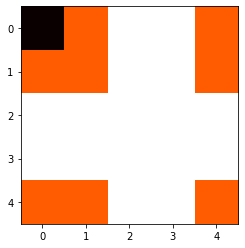

In [8]:
import numpy as np
import matplotlib.pyplot as plt

a = 2*np.ones((5, 5), int) # make numpy array with data
a[0,0] = 0                 # black cell
a[0,1] = a[1,0] = a[1,1] = a[4,4] = a[4,0] = a[4,1] = a[0,4] = a[1,4] = 1 # red cells
plt.imshow(a, cmap='hot');            # create heatmap 0 is black, 1 is red, 2 is white
                                      # don't worry - you don't have to understand the plot commands, yet. 

(a) (2 points) Write a function called `valid_board()` that determines whether a $m\times n$ numpy array is a valid game-of-life board. That means that your function should return the boolean value `True` if every entry in the array is either 0 or 1 and otherwise should return `False`. 

In [9]:
def valid_board(array):
    """checks whether NumPy array is valid game board for game-of-life"""
    # YOUR CODE HERE
    for row in range(np.size(array,0)): #For rows
        for col in range(np.size(array,1)): #For cols
            if(array[row,col]  != 1) & (array[row,col] != 0): #If not a 1 or 0 return false
                return(False)
    return(True)

In [10]:
# Check that your function works as it is supposed to 
valid_board(np.array([[0,1,0],[1,1,0]]))==True
valid_board(np.array([[0,3,0],[-1,1,0]]))==False


True

(b) (5 points) Write a function called `evolution()` that takes as its input a two-dimendional Numpy array. Check, whether the array is a valid game-of-life board. If it is, return the board at the next evolution time step (that is apply the above rules to every cell and return a game board with live or dead cells one time step later). If the board is not valid, return the print statement "your board is not valid". 

Don't forget to comment your code!

In [11]:
def find_neighbors(A,x,y):
    """ find neightbors of cell A[x,y] in A""" 
    m,n = A.shape
    left = A[:,0] # replicate left-most and right-most column
    right = A[:,n-1] 
    new_A = np.concatenate((right[:, np.newaxis],A, left[:,np.newaxis]), axis = 1) # glue on right,left
    top = new_A[0,:] # replicate top and bottom row (already includes "corners") 
    bottom = new_A[m-1,:]
    new_A = np.concatenate((bottom[np.newaxis,:],new_A, top[np.newaxis,:]), axis = 0) # glue on top, bottom
    return new_A[x:x+3, y:y+3]

def evolution(array):
    """evolves game board for game-of-life for one time-step"""
    if(valid_board(array) == False):
        return(print("your board is not valid"))
    new_board = array.copy() # Makes the next generations board
    for row in range(np.size(array,0)): #For all row values
        for col in range(np.size(array,1)): #For all column values
            area = find_neighbors(array,row,col) #Gets all the neighbors
            ones = np.sum(area) #Counts the live neighbors (if the center point is also 1 the count will be 1 higher)
            if(ones < 3) & (array[row,col]==1): #If less than 2 live neighbors it dies
                new_board[row,col] = 0
            elif(array[row,col]==1) & ((ones == 3) | (ones == 4)): #If 2 or 3 neighbors lives
                new_board[row,col] = 1
            elif(array[row,col] == 1) &(ones > 4): #If more than 3 neighbors dies
                new_board[row,col] == 0
            elif(array[row,col] == 0)&(ones == 3): # If 3 neighbors and not alive born
                new_board[row,col] = 1
    return(new_board)
    

**Optional:** If you are not able to implement the `evolution()` function above, provide a written description of your algorithm here instead for potential partial credit. 

YOUR ANSWER HERE

In [12]:
# Check your evolution function 

evolution(np.array([[1, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1],
       [0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0]]))==np.array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 1.],
       [1., 0., 1., 1., 0.]])


array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

**Remark:** The function `print_board()` defined below takes a $m \times n$ NumPy array as its input and returns a printed image of the live (black) and dead (white) cells. Execute the code below to define the function. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def print_board(array):
    """visualizes game board for game of life"""
    plt.imshow(array, cmap = 'binary');

(c) (4 points) Use either NumPy or Scipy to generate a game-of-life board of size $10 \times 10$ in which each cell is a Bernoulli(p) random variable. That is, assume that cells are independent and that each value is 1 with probability p or otherwise 0. Start with p=0.5. Look at your initial board (you don't have to show the image). Show the visualization of the board after 100 steps of evolution. Repeat this process for a number of different random seeds (at least 10 different seeds). You do not have to show us your plots (you can only show one plot at a time per Juypter Notebook cell with the `print_board()` function). What happens if you start with a different (larger, smaller) value of p? Please describe what you observe. 

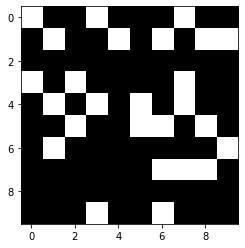

In [14]:
# YOUR CODE HERE
np.random.seed(10)
sample = np.array(stats.bernoulli(.7).rvs(100)).reshape(10,10) # generate 100 RVs from a bernoulli distribution
for i in range(100):
    sample = evolution(sample)
print_board(sample)

If you start with a smaller value of p the population of black squares after 100 steps has a chance of going extinct. If it does survive though the population tends to be smaller than if you started with a higher value of p. After runing the simulation many times with large p I have not seen a case where the population went extinct.